COLLIN DUFRESNE Laurine


M1 Informatique 

22406812

/!\ Disclaimer: pas de rapport PDF à proprement parler. Le fichier PDF inclus dans le zip est une retranscription du notebook en PDF.

## NLP PROJECT - LANGUAGE DETECTION

Aujourd’hui, on utilise toutes et tous des applications qui sont écrites dans notre langue : Google, Netflix, les réseaux sociaux… Mais comment ces outils savent-ils dans quelle langue on s’exprime ? Ici intervient la détection automatique de la langue.

Le but de cette tâche est simple : à partir d’un petit bout de texte, l’ordinateur doit deviner de quelle langue il s’agit. C'est une tâche plus complexe qu’il n'y paraît, surtout quand les phrases sont courtes, remplies de fautes ou écrites en langage familier.

Dans ce projet, l’objectif est d’entraîner un programme capable de reconnaître 17 langues différentes, en utilisant des exemples de textes dans ces langues. Le tout repose sur des techniques d’intelligence artificielle qui permettent à l’ordinateur d’apprendre à reconnaître les particularités de chaque langue (comme les mots, les lettres).

Cette détection est un premier pas essentiel avant d’appliquer d’autres traitements automatiques sur un texte, comme la traduction, la synthèse vocale ou l’analyse de sentiments.

Pour répondre à cet objectif, le projet se divise en plusieurs étapes :

#### I./. Prétraitement et exploration du dataset : nettoyer les données, visualiser la répartition des langues.

#### II./. Test de différentes méthodes de classification :

    II.1) Naive Bayes

    II.2) Régression Logistique et SVM

    II.3) Neural Network: Multi-Layer Perceptron

#### III./. Comparaison des modèles.

# ---------------------------------------------------------------------------------------------------------------------------------------

## I./. PRE-TRAITEMENT ET EXPLORATION DU DATASET

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### DATASET

Pour ce projet, nous avons exploité le jeu de données intitulé "Language Detection", disponible sur Kaggle (https://www.kaggle.com/datasets/basilb2s/language-detection). Ce dataset est conçu pour entraîner des modèles de détection automatique de la langue et comprend des textes dans 17 langues différentes.

#### Description du dataset
Nombre total d'instances : Le dataset contient un total de 10 337 instances de textes.​

Langues représentées :

1) Anglais​
2) Malayalam​
3) Hindi​
4) Tamil​
5) Portugais​
6) Espagnol​
7) Français​
8) Néerlandais​
9) Allemand​
10) Kannada​
11) Arabe​
12) Russe​
13) Italien​
14) Suédois​
15) Tchèque​
16) Indonésien​
17) Turc​

In [ ]:
data = pd.read_csv('Language Detection.csv') # le csv est inclus dans le dossier zip, ainsi que le venv du projet

Ici, on observe la répartition du nombre d'instances par langue:

In [4]:
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

Le dataset présente un déséquilibre significatif entre les différentes langues. 

Par exemple, l’anglais est représenté par 1385 exemples, tandis que l’hindi n’en a que 63. 

Ce déséquilibre peut biaiser les résultats en faveur des langues majoritaires. Il est donc essentiel d'utiliser des métriques fines par classe, comme la précision et le rappel, pour bien évaluer la performance réelle du modèle.

In [5]:
print("Colonnes:", data.columns)

print(data)

Colonnes: Index(['Text', 'Language'], dtype='object')
                                                    Text Language
0       Nature, in the broadest sense, is the natural...  English
1      "Nature" can refer to the phenomena of the phy...  English
2      The study of nature is a large, if not the onl...  English
3      Although humans are part of nature, human acti...  English
4      [1] The word nature is borrowed from the Old F...  English
...                                                  ...      ...
10332  ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...  Kannada
10333  ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...  Kannada
10334  ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...  Kannada
10335  ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...  Kannada
10336  ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...  Kannada

[10337 rows x 2 columns]


Voici quelques exemples de texte que l'on peut trouver dans le dataset:

In [6]:
print(data[data['Language'] == 'French'].sample(3)) # pour obtenir 3 phrases au hasard en français


                                                   Text Language
3661  Toutefois, les études ne concluent pas sur le ...   French
3670  Jusqu’à ce que le conseil d’administration en ...   French
3726  En Chine, le moteur de recherche Baidu a ouver...   French


In [7]:
print(data[data['Language'] == 'English'].sample(3))


                                                  Text Language
289  [34] Others suggest that the growth is flatten...  English
516  [204] Data has also shown that Africa-related ...  English
815  [32] According to Michael I. Jordan, the ideas...  English


In [8]:
print(data[data['Language'] == 'Italian'].sample(3))


                                                   Text Language
7513  quindi uno alla volta assicurati di pronunciar...  Italian
7278  Molti degli elogi le sono attribuiti per il fa...  Italian
7429  Gli algoritmi genetici sono stati applicati co...  Italian


### 1) PRE-TRAITEMENT

Avant d’entraîner les modèles de détection de langues, une étape essentielle consiste à nettoyer les textes pour supprimer les éléments non pertinents tout en préservant l'information dont on a besoin.

Le nettoyage a été réalisé de la manière suivante :

1) Conversion en minuscules : pour uniformiser les textes, car "Bonjour" et "bonjour" donne la même information.

2) Suppression de la ponctuation : les signes comme "!", "?", "..." ont été retirés car ils n’apportent généralement pas d'information pour la détection de langue.

3) Suppression des chiffres et caractères spéciaux : pour éviter d'introduire du bruit.

4) Conservation des caractères alphabétiques de tous les alphabets : pour préserver la richesse du dataset multilingue.

5) Réduction des espaces multiples : les espaces consécutifs ont été remplacés par un seul espace pour normaliser le format.

Cette étape a été appliquée à l’ensemble des données à l’aide d’une fonction Python utilisant des expressions régulières adaptées aux caractères Unicode, afin de ne pas altérer les langues dont l'alphabet n'est pas l'alphabet latin.

In [9]:
data['Text_Original'] = data['Text']  # on garde une copie originale avant nettoyage

In [10]:
import re 

def clean_text(text):
    text = str(text).lower() # met tout en minuscule
    text = re.sub(r'[^\w\s]', ' ', text) # enleve la ponctuation
    text = re.sub(r'[\d_]', ' ', text) # enleve les chiffres e t underscore
    text = re.sub(r'\s+', ' ', text).strip() # enleve les espaces multiples
    return text

data['Text_Clean'] = data['Text_Original'].apply(clean_text)

On peut comparer les données avant et après nettoyage

In [70]:
print(data[['Language', 'Text_Original', 'Language', 'Text_Clean']].sample(5))

        Language                                      Text_Original  \
8339    Sweedish  En Wikipediaartikel som stämmer in på följande...   
10234    Kannada              ನಾನು ನಾಳೆ ಒಂದು ರೀತಿಯ ಕಾರ್ಯನಿರತವಾಗಿದೆ.   
1136     English    i wasn't listening because maybe you were busy.   
261      English  It was initially an English-language encyclope...   
1884   Malayalam                              നിങ്ങൾ ആഗ്രഹിച്ചില്ല.   

        Language                                         Text_Clean  
8339    Sweedish  en wikipediaartikel som stämmer in på följande...  
10234    Kannada                   ನ ನ ನ ಳ ಒ ದ ರ ತ ಯ ಕ ರ ಯನ ರತವ ಗ ದ  
1136     English     i wasn t listening because maybe you were busy  
261      English  it was initially an english language encyclope...  
1884   Malayalam                               ന ങ ങൾ ആഗ രഹ ച ച ല ല  


On peut observer la longueur des phrases avant et après le netoyage, pour voir l'impact que le nettoyage a eu sur les textes.

In [12]:
data['Length_Original'] = data['Text_Original'].str.len()
data['Length_Clean'] = data['Text_Clean'].str.len()

print(data['Text_Original'].str.len())
print(data['Text_Clean'].str.len())


0         85
1         87
2         65
3        123
4        194
        ... 
10332     63
10333    231
10334    102
10335     66
10336    134
Name: Text_Original, Length: 10337, dtype: int64
0         79
1         83
2         62
3        121
4        181
        ... 
10332     55
10333    201
10334     87
10335     59
10336    117
Name: Text_Clean, Length: 10337, dtype: int64


Pour visualiser cela plus facilement, on peut également observer la moyenne de la longueur des phrases, pour chaque langue.

In [13]:
data.groupby('Language')[['Length_Original', 'Length_Clean']].mean().sort_values('Length_Clean', ascending=False)


,Length_Original,Length_Clean
Language,,
Hindi,1209.190476,975.412698
French,145.135108,139.358974
Italian,142.157593,137.948424
Portugeese,139.261164,132.133965
English,136.901083,130.337184
Spanish,130.174603,124.526252
Sweedish,118.230769,114.198225
Russian,112.121387,105.969653
Greek,106.260274,103.742466


On observe des différences importantes dans la longueur moyenne des phrases selon la langue. 

Par exemple, les textes en Hindi sont en moyenne 8 fois plus longs que ceux en Allemand. De telles disparités peuvent induire un biais si le modèle apprend à associer la longueur d’un texte à sa langue, au lieu de se concentrer sur les patterns linguistiques. 

### 2) Séparation des données en 2 jeux : Train & Test

Afin d'entraîner et d'évaluer nos modèles de manière fiable, nous avons divisé notre jeu de données en deux parties à l'aide de la fonction <b>train_test_split</b> de la bibliothèque scikit-learn :

- 80% des données ont été utilisées pour l'entraînement du modèle (X_train, y_train)

- 20% des données ont été réservées pour le test final (X_test, y_test)

Cette fonction permet de réaliser un échantillonnage aléatoire des données, tout en maintenant la correspondance entre les textes (X) et leurs étiquettes de langue (y). Le paramètre <b>random_state</b> permet de fixer la seed aléatoire, assurant ainsi la reproductibilité des résultats.

Cette répartition est courante en apprentissage automatique, permettant à la fois :

- d’avoir une quantité suffisante de données pour l’apprentissage,

- et une estimation fiable des performances du modèle sur des données jamais vues.

Pour des cas plus complexes, on pourrait également ajouter un jeu de validation (dev set) pour ajuster les hyperparamètres, mais pour ce projet nous avons jugé que la division 80/20 était suffisante.



In [14]:
from sklearn.model_selection import train_test_split

# séparation en 80-20
X_train, X_test, y_train, y_test = train_test_split(data['Text_Clean'], data['Language'], test_size=0.2, random_state=42)

In [15]:
print(f"Training set: {len(X_train)} examples")
print(f"Test set: {len(X_test)} examples")

Training set: 8269 examples
Test set: 2068 examples


In [16]:
print(X_train.sample(3))

3570                          améliorez le ou discutez en
3419    l idée sous jacente est que la nature est un d...
6488    я облажался я облажался если ты хочешь чтобы к...
Name: Text_Clean, dtype: object


In [17]:
print(X_test.sample(3))

9401                                           دعني انتهي
3555    les pages de wikipédia sont regroupées dans di...
3944    est une façon très française de dire réunion o...
Name: Text_Clean, dtype: object


# ---------------------------------------------------------------------------------------------------------------------------------------

## II./. TEST DE DIFFERENTES METHODES DE CLASSIFICATION

## II.1) NAIVE BAYES 

### VECTORISATION

Avant de pouvoir entraîner le modèle, une étape cruciale est la transformation des textes bruts en un format numérique exploitable par des modèles de machine learning. Cette transformation est réalisée à l'aide de la technique de vectorisation. 

Les modèles d’apprentissage traditionnels ne peuvent pas traiter du texte brut (ex: "Bonjour, ça va ?"). Ils attendent des représentations numériques.
Chaque mot, ou n-grammes, est représenté comme une caractéristique dans un espace vectoriel.

CountVectorizer est une méthode de vectorisation proposée par la bibliothèque scikit-learn. Elle convertit un corpus de textes en une matrice de fréquences, où :

- chaque ligne représente un document, mais ici c'est une phrase.

- chaque colonne correspond à un mot ou n-gramme.

La valeur dans la cellule indique combien de fois ce mot apparaît dans ce document.
C’est une méthode simple mais efficace pour capturer des patterns linguistiques de base.

Nous avons choisi CountVectorizer car :

- rapide et facile à implémenter.

- fonctionne très bien avec des modèles linéaires simples comme Naive Bayes.

- adapté pour des tâches de classification de textes courts.

- ne nécessite pas d'entraînement préalable, contrairement à d'autres méthodes plus complexes (Word2Vec, BERT…).

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='char', ngram_range = (1,4)) # on initialise le CountVectorizer

Nous avons choisi une configuration basée sur les caractères (analyzer), avec des n-grammes de longueur 1 à 4 (ngram_range):

- analyzer='char' : au lieu de traiter les mots, on extrait des séquences de caractères, ce qui est très pertinent pour détecter les particularités de l'orthographe des langues.

- ngram_range=(1, 4) : on capture des unigrammes, bigrammes, trigrammes et 4-grammes, permettant au modèle de repérer à la fois des lettres isolées et des patterns plus complexes.

In [19]:
# on a testé différents paramètres:
# 
# cv = CountVectorizer()
# cv = CountVectorizer(analyzer='char')
# cv = CountVectorizer(ngram_range = (1,3)) 
# cv = CountVectorizer(analyzer='char', ngram_range = (1,3))
# cv = CountVectorizer(analyzer='char', ngram_range = (1,5))
#
# aucun de ces test n'apportaient d'amélioration en terme d'accuracy  

Lors de la vectorisation, nous utilisons <b>fit_transform()</b> sur le jeu d'entraînement afin d’apprendre le vocabulaire à partir des textes. Ensuite, nous utilisons uniquement <b>transform()</b> sur le jeu de test, afin de convertir les textes en vecteurs en se basant strictement sur les mêmes caractéristiques que celles apprises pendant l'entraînement.

Cette approche évite tout data leakage, ce qui fausserait l’évaluation du modèle.

In [20]:
X_train_cv = cv.fit_transform(X_train) # on applique le CV

In [21]:
# on fait la même transformation sur le set de test 
X_test_cv = cv.transform(X_test)

In [22]:
print("Shape de X_train_vec:", X_train_cv.shape) # nb examples de texte: 8269, nb de features: 34326
print("Shape de X_test_vec:", X_test_cv.shape) # nb examples de texte: 2068, nb de features: 34326

Shape de X_train_vec: (8269, 137063)
Shape de X_test_vec: (2068, 137063)


In [23]:
print("Examples de tokens:", cv.get_feature_names_out()[:50])

Examples de tokens: [' ' ' a' ' a ' ' a a' ' a b' ' a c' ' a d' ' a e' ' a f' ' a g' ' a h'
 ' a i' ' a j' ' a k' ' a l' ' a m' ' a n' ' a o' ' a p' ' a q' ' a r'
 ' a s' ' a t' ' a u' ' a v' ' a w' ' a z' ' a é' ' a ú' ' aa' ' aa '
 ' aan' ' aar' ' ab' ' ab ' ' aba' ' abb' ' abd' ' abe' ' abi' ' abl'
 ' abo' ' abr' ' abs' ' abu' ' ac' ' aca' ' acc' ' ace' ' ach']


In [24]:
X_dense_cv = X_train_cv.toarray() # sert à observer le résultat 

word_freq_cv = X_dense_cv.sum(axis=0).flatten()  # on flatten pour obtenir un vecteur à 1 dim

data_frame_cv = pd.DataFrame(zip(cv.get_feature_names_out(), word_freq_cv), columns=['Word', 'Frequency'])

data_frame_cv = data_frame_cv.sort_values(by='Frequency', ascending=False)

print(data_frame_cv)

        Word  Frequency
0                194265
24768      e      75005
16024      a      52278
33052      i      48495
42953      n      42052
...      ...        ...
40379   ltaa          1
50       aci          1
34       ab           1
40390   ltay          1
137056  ൾ ൽ           1

[137063 rows x 2 columns]


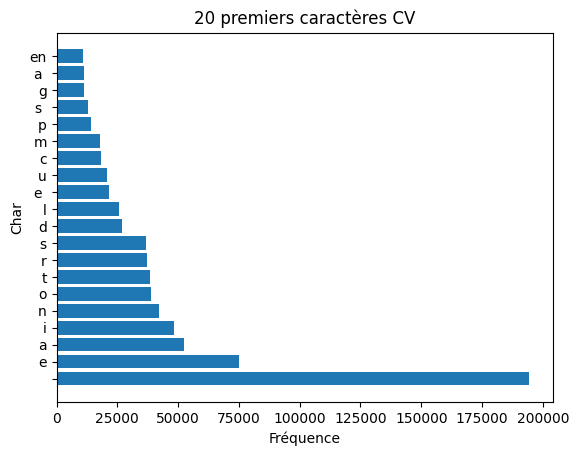

In [90]:
chars_cv = data_frame_cv.head(20)

plt.barh(chars_cv['Word'], chars_cv['Frequency'])
plt.xlabel('Fréquence')
plt.ylabel('Char')
plt.title('20 premiers caractères CV') 
plt.show()

Après avoir vectorisé les textes à l’aide de CountVectorizer et transformé les textes en une matrice de fréquences de mots, nous allons utilisé le modèle MultinomialNB() de la bibliothèque sickit-learn. 

Le modèle Naive Bayes est un algorithme de classification probabiliste basé sur le théorème de Bayes, avec une hypothèse forte: les caractéristiques, donc ici les n-grammes, sont indépendantes les unes des autres, d'où le terme naïf.

Il calcule, pour chaque classe possible, la probabilité que le texte appartienne à cette classe, puis choisit la plus probable.

On utilise ici Naive Bayes car il est :

- simple et rapide à entraîner.

- très efficace sur des textes courts, notamment en combinaison avec des n-grammes de caractères.

- peu sensible au bruit ou à la redondance des caractéristiques.

- bien adapté à la classification de texte.

Dans notre cas, il donne déjà de très bons résultats, même sans réglages complexes.

In [91]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB(alpha=0.1)
nb_model.fit(X_train_cv, y_train) # entraîne le classifieur en ajustant ses paramètres internes sur le set de train

MultinomialNB(alpha=0.1)

- <b>alpha=1.0</b> : le paramètre de lissage de Laplace, qui évite que des probabilités deviennent nulles quand un mot n’a jamais été vu dans une classe.

Nous avons gardé la valeur par défaut (alpha=1.0) car elle donne de bonnes performances dans notre tâche.

In [27]:
y_pred_nb = nb_model.predict(X_test_cv)

### EVALUATION DES PERFORMANCES

Pour évaluer notre modèle, on utilise plusieurs métriques qui donnent des informations différentes sur ses performances :

- Accuracy : pourcentage de prédictions correctes par rapport au total des prédictions. Néanmoins, l'accuracy peut être trompeuse si les classes sont déséquilibrée.

- Précision : mesure combien de fois le modèle a bien identifié une langue parmi toutes les fois où il a prédit cette langue. C’est utile pour savoir si le modèle fait beaucoup de faux positifs. Si la précision est faible, ça veut dire que le modèle fait beaucoup de fausses alertes.

- Rappel : mesure combien de fois le modèle a trouvé la bonne langue parmi toutes les fois où elle était vraiment présente dans les données. Si le modèle a un faible rappel, cela signifie qu’il rate beaucoup de cas où la langue devrait être détectée.

- F1-Score : compromis entre la précision et le rappel. C'est un bon indicateur global de la performance du modèle, afin d'éviter les fausses alertes et repérer toutes les instances correctement. Si l’une des deux métriques précédentes est très faible, le F1-score aussi.

Ces métriques nous aident à comprendre si notre modèle est bien équilibré. Pour notre tâche de détection de langue, on veut à la fois éviter les fausses prédictions et éviter de ne pas prédire certaines langues. On réutilisera ces métriques pour évaluer les prochains modèles.

In [28]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy NB:", accuracy_score(y_test, y_pred_nb))
print("\nClassification report NB:\n", classification_report(y_test, y_pred_nb))

Accuracy NB: 0.9898452611218569

Classification report NB:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.96      0.97      0.97        73
       Dutch       1.00      0.99      1.00       111
     English       0.98      1.00      0.99       291
      French       1.00      0.99      0.99       219
      German       1.00      0.98      0.99        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.99      0.99       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.99      0.99      0.99       144
     Russian       1.00      1.00      1.00       136
     Spanish       1.00      0.99      0.99       160
    Sweedish       0.96      0.98      0.97       133
       Tamil       1.00      1.00      1.00        87
     Turkish       0.

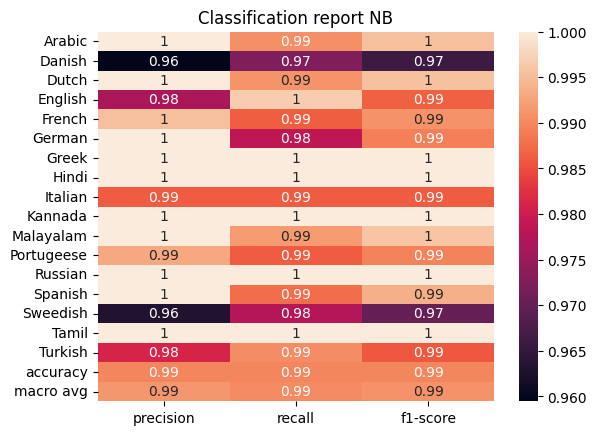

In [29]:
# on peut également afficher ce classification report pour mieux le visualiser
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

report_nb_df = pd.DataFrame(report_nb).transpose()

sns.heatmap(report_nb_df.iloc[:-1, :-1], annot=True)
plt.title("Classification report NB")
plt.show()

Les scores de classification obtenus sont globalement excellents, avec :

- une précision comprise entre 0.96 et 1.00,

- un rappel entre 0.97 et 1.00,

- un F1-score entre 0.97 et 1.00.

Cela signifie que :

1. Le modèle fait très peu d'erreurs lorsqu’il prédit une langue.

2. Il rate rarement des exemples de langues présentes dans les données.

3. Il atteint un excellent équilibre entre les faux positifs et les faux négatifs.

Ces résultats traduisent une robustesse globale, avec une capacité de généralisation satisfaisante sur l’ensemble des classes, y compris sur les langues proches comme l’espagnol et le portugais, qui peuvent être confondues. 

Le fait que toutes les classes aient des scores très proches suggère aussi que l’entraînement a bien capté les particularités lexicales de chaque langue, même pour celles qui ont moins de données.

On peut également afficher la matrice de confusion.

La matrice de confusion permet de visualiser les performances du modèle en termes de bonnes et mauvaises classifications pour chaque langue. Elle compare les valeurs réelles avec les prédictions faites par le modèle.

Elle se présente sous forme d’une grille où :

- les lignes correspondent aux langues présentes

- les colonnes correspondent aux langues prédites 

Les valeurs diagonales représentent les prédictions correctes pour chaque langue, tandis que les autres valeurs représentent les erreurs. Plus les valeurs hors de la diagonale sont faibles, mieux le modèle a fonctionné.

Cette matrice est particulièrement utile pour identifier les langues qui sont souvent confondues, et ainsi ajuster ou améliorer le modèle.


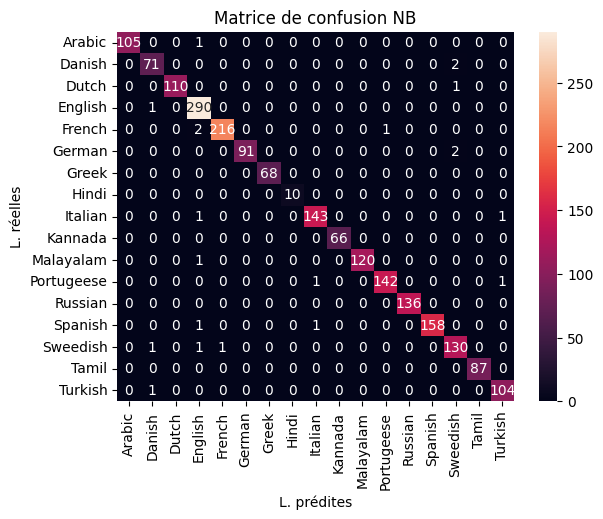

In [30]:
from sklearn.metrics import confusion_matrix

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(conf_matrix_nb, annot=True, fmt='d', xticklabels=nb_model.classes_.tolist(), yticklabels=nb_model.classes_.tolist())
plt.xlabel("L. prédites")
plt.ylabel("L. réelles")
plt.title("Matrice de confusion NB")
plt.show()

L’analyse de la matrice de confusion révèle que la grande majorité des prédictions sont correctes, avec très peu d’erreurs. 

Cela confirme les très bons scores de précision, de rappel et de F1 observés dans les rapports de classification.

Cependant, quelques confusions subsistent entre certaines paires de langues, notamment :

- Danois et Suédois (2 erreurs) : deux langues germaniques scandinaves très proches lexicalement, ce qui peut brouiller les distinctions pour un modèle basé uniquement sur des n-grammes de caractères.

- Anglais et Français (2 erreurs) : malgré leurs différences structurelles, des phrases courtes ou emprunts mutuels peuvent entraîner une ambiguïté.

- Suédois et Allemand (2 erreurs) : les similarités phonétiques ou certains mots communs peuvent induire le modèle en erreur.

Ces erreurs restent marginales mais montrent que dans un système réel, une analyse linguistique plus fine pourrait permettre de mieux les traiter.

### TESTS "MANUELS"

Une idée intéressante serait de passer des phrases écrites par nos soins pour vérifier si le modèle est en effet capable de détecter la langue.

In [31]:
phrase = "Un des animaux emblématiques de l'île de la Réunion est le paille-en-queue." # en essayant de prendre une phrase qui ne serait pas déjà dans le dataset

In [32]:
phrase_cv = cv.transform([phrase])  # pour garder le format liste

In [33]:
pred_lang_nb = nb_model.predict(phrase_cv)

proba_nb = nb_model.predict_proba(phrase_cv) # on extrait également la confiance du modèle

In [34]:
print("Langue prédite:", pred_lang_nb[0])
print(f"Confiance : {max(proba_nb[0]):.2f}")

Langue prédite: French
Confiance : 1.00


## II.2) TF-IDF AVEC REGRESSION LOGISTIQUE

### VECTORISATION

A nouveau nous allons devoir premièrement faire une étape de vectorisation des données. Ici nous allons utiliser TF-IDF. 

TF-IDF (Term Frequency – Inverse Document Frequency) est une méthode de pondération utilisée pour représenter des textes sous forme numérique, tout en mettant en valeur les mots les plus importants pour chaque document.

Comme dit précedemment, l’objectif du projet est d’extraire des caractéristiques significatives des textes. TF-IDF nous permet de transformer les documents textuels en vecteurs numériques tout en réduisant l’impact des mots courants peu informatifs. Cela améliore la qualité des données d’entrée pour notre modèle de régression logistique, qui pourra ainsi mieux apprendre à différencier les langues en se basant sur les termes les plus représentatifs de chaque langue.

Nous utilisons TfidvfVectorizer de la bibliothèque sickit-learn.


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# on garde les mêmes paramètres que précedemment 
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1, 4), max_df=0.95, min_df=2) # on exclue les mots apparaissant dans plus de 95% des documents et on ignore ceux aparaissant dans moins de 2 documents

In [36]:
# on applique le Vectorizer de manière similaire que précedemment 

X_train_tfidf = tfidf.fit_transform(X_train)  
X_test_tfidf = tfidf.transform(X_test)

In [37]:
print("Shape de X_train_tfidf:", X_train_tfidf.shape)
print("Shape de X_test_tfidf:", X_test_tfidf.shape)

Shape de X_train_tfidf: (8269, 87075)
Shape de X_test_tfidf: (2068, 87075)


In [38]:
print("Examples de tokens:", tfidf.get_feature_names_out()[:50])

Examples de tokens: [' a' ' a ' ' a a' ' a b' ' a c' ' a d' ' a e' ' a f' ' a g' ' a h' ' a i'
 ' a j' ' a k' ' a l' ' a m' ' a n' ' a o' ' a p' ' a q' ' a r' ' a s'
 ' a t' ' a u' ' a v' ' a w' ' a é' ' a ú' ' aa' ' aa ' ' aan' ' aar'
 ' ab' ' aba' ' abb' ' abe' ' abi' ' abl' ' abo' ' abr' ' abs' ' abu'
 ' ac' ' aca' ' acc' ' ace' ' ach' ' acl' ' aco' ' acq' ' acr']


In [39]:
X_dense_tfidf = X_train_tfidf.toarray() # on reprend le code de précedemment

word_freq_tfidf = X_dense_tfidf.sum(axis=0).flatten() 

data_frame_tfidf = pd.DataFrame(zip(tfidf.get_feature_names_out(), word_freq_tfidf), columns=['Word', 'Frequency'])

data_frame_tfidf = data_frame_tfidf.sort_values(by='Frequency', ascending=False)

print(data_frame_tfidf)

       Word   Frequency
17562     e  881.234602
11325     a  620.541117
23507     i  576.431087
30592     n  510.187978
32819     o  479.170462
...     ...         ...
75170   कलन    0.001343
77483  रप ड    0.001343
6473    आपत    0.001343
74811  एक ऑ    0.001343
75356  गय द    0.001343

[87075 rows x 2 columns]


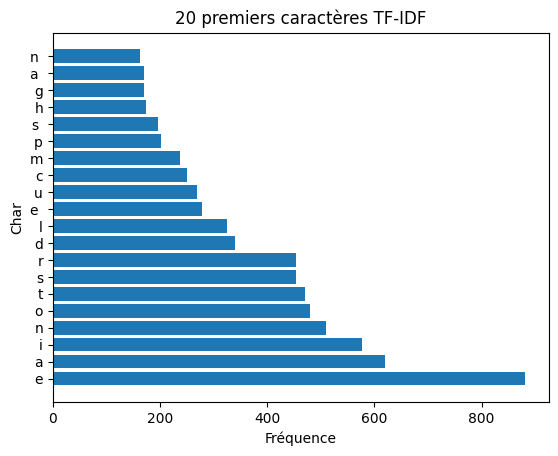

In [87]:
chars_tfidf = data_frame_tfidf.head(20)

plt.barh(chars_tfidf['Word'], chars_tfidf['Frequency'])
plt.xlabel('Fréquence')
plt.ylabel('Char')
plt.title('20 premiers caractères TF-IDF') 
plt.show()

La régression logistique est un modèle de classification utilisé pour prédire des classes à partir de variables d’entrée. Bien que son nom inclut "régression", c’est en fait un modèle de classification binaire. Cependant, il peut être étendu à des problèmes multiclasse, comme dans notre cas de détection de langue.

Elle repose sur une fonction sigmoîde pour estimer la probabilité qu'une instance appartienne à une classe donnée. La sortie est un score entre 0 et 1, que l'on interprète comme une probabilité.

Nous utilisons la régression logistique pour plusieurs raisons :

- modèle simple et rapide à entraîner, particulièrement pour les données linéairement séparables.

- adapté aux problèmes multiclasse, ici on a plusieurs langues à détecter.

La régression logistique est interprétable et donne une probabilité pour chaque prédiction, ce qui permet de mieux comprendre les décisions du modèle.

En somme, la régression logistique permet d’obtenir une bonne performance sans nécessiter une énorme complexité, ce qui est idéal pour un problème de classification comme la détection de langues.

In [41]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

- <b>max_iter=1000</b>: Ce paramètre définit le nombre maximum d'itérations pour l'optimisation. Nous avons choisi cette valeur pour nous assurer que l'algorithme ait suffisamment de temps pour converger, tout en restant simple et rapide.

In [42]:
# d'autres paramètres ont été testés:

# lr_model =LogisticRegression(max_iter=1000, solver='liblinear', multi_class='ovr')
# lr_model =LogisticRegression(max_iter=1000, multi_class='ovr')
# lr_model =LogisticRegression(max_iter=1000, solver='liblinear')

# solver='liblinear' : indique le solveur utilisé pour optimiser la fonction de coût. 
# liblinear est une bonne option pour des petits à moyens ensembles de données et permet de gérer des problèmes multiclasse

# multi_class='ovr' : spécifie l'approche de classification multiclasse
# one-vs-rest est utilisée, un classifieur est créé pour chaque classe et la classe choisie est celle dont la probabilité est la plus élevée

# ces différents tests n'amélioraient pas l'accuracy

In [43]:
lr_model.fit(X_train_tfidf, y_train)  

LogisticRegression(max_iter=1000)

In [44]:
y_pred_lr = lr_model.predict(X_test_tfidf)

### EVALUATION DES METRIQUES

On utilise les mêmes métriques que précedemment pour pouvoir comparer les modèles.

In [45]:
print("Accuracy LR:", accuracy_score(y_test, y_pred_lr))
print("Classification report LR:\n", classification_report(y_test, y_pred_lr))

Accuracy LR: 0.9850096711798839
Classification report LR:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.96      0.97      0.97        73
       Dutch       0.98      0.97      0.98       111
     English       0.97      1.00      0.98       291
      French       0.99      0.98      0.98       219
      German       1.00      0.96      0.98        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.98      0.98      0.98       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.98      0.98      0.98       144
     Russian       1.00      1.00      1.00       136
     Spanish       0.99      0.97      0.98       160
    Sweedish       0.97      0.98      0.97       133
       Tamil       1.00      1.00      1.00        87
     Turkish       0.9

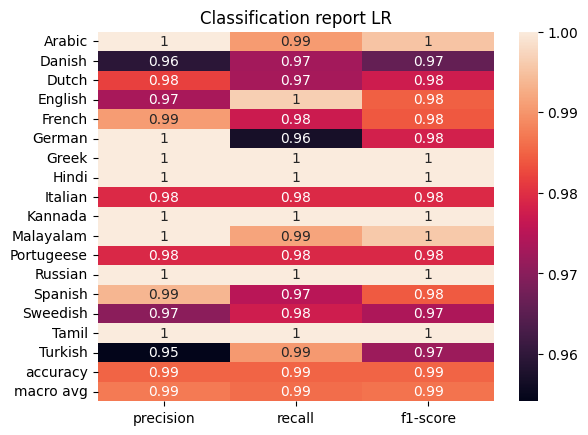

In [46]:
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

report_lr_df = pd.DataFrame(report_lr).transpose()

sns.heatmap(report_lr_df.iloc[:-1, :-1], annot=True)
plt.title("Classification report LR")
plt.show()

On observe à nouveau de très bon résultats pour ce rapport de classification où les valeurs ne descendent pas en dessous de 0.95, ce qui est rassurant.

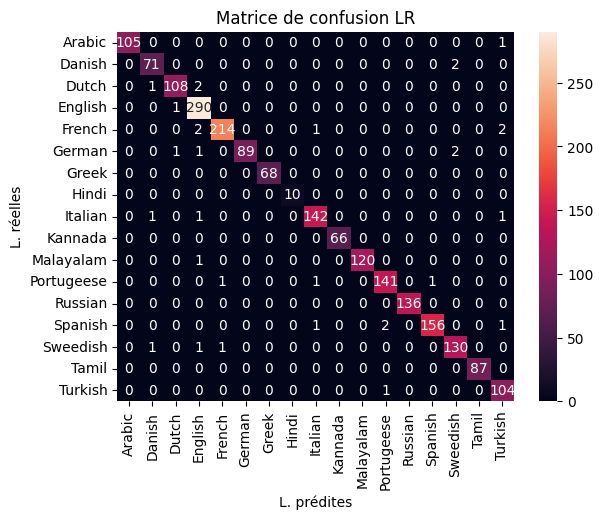

In [47]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(conf_matrix_lr, annot=True, fmt='d', xticklabels=lr_model.classes_.tolist(), yticklabels=lr_model.classes_.tolist()) # les labels sont les mêmes pour tous les modèles
plt.xlabel("L. prédites")
plt.ylabel("L. réelles")
plt.title("Matrice de confusion LR")
plt.show()

A nouveau, la matrice de confusion vient confirmer les résultats obtenus dans le rapport de classification. On peut néanmoins observer quelques erreurs supplémentaires entre certaines langues que l'on n'avait pas observé dans la matrice de confusion précédente (NB).

## II.2) TF-IDF AVEC SVM

Le Support Vector Machine (SVM) est un modèle de classification puissant, particulièrement utilisé pour des problèmes de classification binaire, mais il peut être étendu pour les problèmes multiclasse, comme dans notre cas de détection de langue.

L’idée de base de SVM est de trouver une hyperplan optimal qui sépare les données de manière à maximiser la marge entre les classes. L’objectif est de trouver une frontière de décision qui soit la plus éloignée possible des exemples de chaque classe.

En pratique, SVM utilise des kernels pour transformer les données dans un espace de plus grande dimension où elles deviennent linéairement séparables.

Le SVM est très efficace pour les problèmes de classification où les classes sont distinctes mais non nécessairement linéaires dans leur représentation. 

En utilisant la vectorisation TF-IDF, nous transformons le texte en un espace de caractéristiques où chaque mot a une importance mesurée. Le SVM est capable de séparer ces points de manière optimale même quand les relations ne sont pas linéaires, grâce à des noyaux comme le kernel RBF.

Le SVM fonctionne bien avec des espaces de caractéristiques hautement dimensionnels (comme ceux créés par TF-IDF) et donne souvent de bons résultats pour les problèmes de classification de texte, comme la détection de langues.

In [48]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

- <b>kernel='rbf'</b> : Radial Basis Function (RBF) est l'un des kernels les plus populaires dans les SVM. Il permet de transformer les données dans un espace de plus grande dimension pour mieux séparer les classes lorsque les données ne sont pas linéairement séparables. C’est un bon choix pour des tâches de classification de texte.

- <b>C=1.0</b> : compromis entre l'optimisation de la marge et l’erreur de classification. Plus la valeur de C est grande, plus le modèle sera strict sur les erreurs de classification. À l'inverse, des valeurs plus petites permettent une plus grande tolérance aux erreurs, ce qui peut être utile pour éviter le sur-apprentissage.

- <b>gamma='scale'</b> : Le paramètre gamma définit l'influence d'un seul point de donnée. La valeur scale est une valeur par défaut dans scikit-learn et est calculée par 1/nb_features. Cela permet au noyau de s'adapter mieux aux données tout en contrôlant le sur-apprentissage.

In [49]:
# d'autres paramètres ont été testés:

# svm_model = SVC(kernel='linear', C=1.0, gamma='scale')
# svm_model = SVC(kernel='linear')

# ces paramètres ne permettaient pas d'améliorer l'accuracy

In [50]:
svm_model.fit(X_train_tfidf, y_train)

SVC()

In [51]:
y_pred_svm = svm_model.predict(X_test_tfidf)

In [52]:
print("Accuracy SVM :", accuracy_score(y_test, y_pred_svm))
print("Classification report SVM:\n", classification_report(y_test, y_pred_svm))

Accuracy SVM : 0.9840425531914894
Classification report SVM:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.95      0.96      0.95        73
       Dutch       0.98      0.96      0.97       111
     English       0.97      1.00      0.98       291
      French       0.99      0.98      0.98       219
      German       1.00      0.96      0.98        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.99      0.97      0.98       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.99      0.97      0.98       144
     Russian       0.99      1.00      0.99       136
     Spanish       0.98      0.98      0.98       160
    Sweedish       0.96      0.98      0.97       133
       Tamil       1.00      1.00      1.00        87
     Turkish       

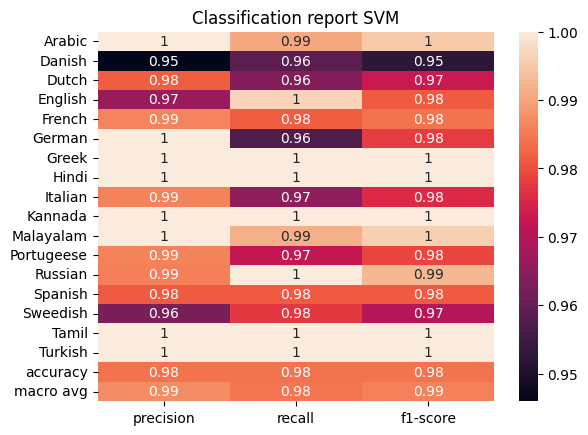

In [53]:
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

report_svm_df = pd.DataFrame(report_svm).transpose()

sns.heatmap(report_svm_df.iloc[:-1, :-1], annot=True)
plt.title("Classification report SVM")
plt.show()

On peut faire des observations similaires pour la matrice de confusion du SVM.

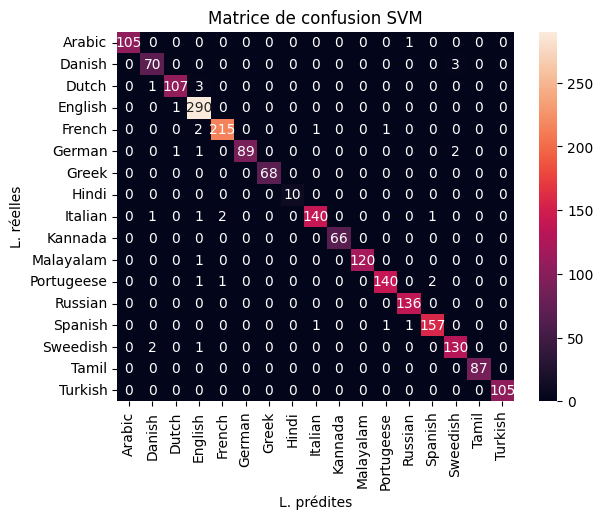

In [54]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=svm_model.classes_.tolist(), yticklabels=svm_model.classes_.tolist())  
plt.xlabel("L. prédites")
plt.ylabel("L. réelles")
plt.title("Matrice de confusion SVM")
plt.show()

Encore une fois, on obtient une matrice de confusion très représentative des scores obtenus dans le rapport de classification.

###  TESTS MANUELS

On peut également tester ces deux modèles sur la même phrase qu'on a définit précédemment pour voir s'ils sont capables d'en détecter la langue.

In [55]:
# rappel: phrase = "Un des animaux emblématiques de l'île de la Réunion est le paille-en-queue."

In [56]:
phrase_tfidf = tfidf.transform([phrase])  

In [57]:
# Logistic Regression
pred_lang_lr = lr_model.predict(phrase_tfidf)
proba_lr = lr_model.predict_proba(phrase_tfidf)

print("Langue prédite LR:", pred_lang_lr[0])
print(f"Confiance : {max(proba_lr[0]):.2f}")

Langue prédite LR: French
Confiance : 0.94


In [58]:
import numpy as np

# SVM
pred_lang_svm = svm_model.predict(phrase_tfidf)
print("Langue prédite SVM:", pred_lang_svm[0])

decision_function = svm_model.decision_function(phrase_tfidf) # la fonction predict_proba n'existe pas pour SVC, donc on doit utiliser un score de decision

max_conf = max(decision_function[0])

proba_svm = 1 / (1 + np.exp(- max_conf)) # la fonction sigmoïde transforme ce score en une probabilité qui peut être interprétée comme une confiance

print(f"Confiance : {proba_svm:.2f}")

Langue prédite SVM: French
Confiance : 1.00


## II.3) NEURAL NETWORK: MULTI-LAYER PERCEPTRON

Un MLP est un type de réseau de neurones artificiel qui appartient à la famille des réseaux de neurones supervisés. Il s’agit d’un réseau de neurones feed-forward entraîné à l’aide de la descente de gradient stochastique avec backpropagation.

Il est composé d’une ou plusieurs couches cachées, situées entre la couche d’entrée et la couche de sortie. Chaque neurone de ces couches applique une transformation non linéaire sur une combinaison linéaire des entrées. Cela permet au MLP de modéliser des relations complexes entre les données d’entrée et les labels.

Dans le cadre de la détection de langue, un MLP est intéressant car :

- il peut apprendre des motifs complexes dans les données textuelles vectorisées avec TF-IDF.

- il est capable de modéliser des non-linéarités que des modèles plus simples ne peuvent pas capturer.

- il peut s'adapter à des jeux de données multilingues avec un grand nombre de classes.

Fonctionnement:

- prend les données vectorisées en entrée.

- propage l’information à travers les couches de neurones (chaque neurone applique une fonction d’activation, typiquement ReLU pour les couches cachées et softmax en sortie pour la classification multiclasse).

- compare la sortie prédite au label réel via une fonction de perte (cross-entropy pour la classification).

- ajustant les poids via backpropagation et descente de gradient.

In [73]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, learning_rate_init=0.001, tol=1e-4)

- <b>hidden_layer_sizes=(100,)</b>: une seule couche cachée composée de 100 neurones. Cette taille est un bon compromis entre complexité et capacité d’apprentissage pour notre tâche.

- <b>max_iter=500</b> : le nombre maximal d’itérations pour entraîner le modèle, important pour la convergence. Ici, 500 itérations permet d'assurer un temps de convergence raisonnable.

- <b>learning_rate_init=0.001</b> : taux d’apprentissage initial utilisé pour ajuster les poids du réseau.  La valeur 0.001 est un choix courant pour un bon équilibre. Il n'est ni trop grand, ni trop petit.

- <b>tol=1e-4</b> : seuil de tolérance pour arrêter l'entraînement si la performance ne s’améliore plus suffisamment. Cela permet de prévenir le surapprentissage et d’économiser du temps de calcul.

Nous n'avons pas pu évaluer d'autres paramètres. Néanmoins, ceux-ci nous apportait déjà des résultats convenables dans le cadre de notre tâche.

In [74]:
mlp_model.fit(X_train_tfidf, y_train)

MLPClassifier(max_iter=500)

In [75]:
y_pred_mlp = mlp_model.predict(X_test_tfidf)

### EVALUATION DES METRIQUES

In [78]:
print("Accuracy MLP:", accuracy_score(y_test, y_pred_mlp))
print("Classification report MLP:\n", classification_report(y_test, y_pred_mlp))

Accuracy MLP: 0.9859767891682786
Classification report MLP:
               precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       106
      Danish       0.91      0.97      0.94        73
       Dutch       0.98      0.98      0.98       111
     English       0.98      0.99      0.99       291
      French       0.98      0.99      0.98       219
      German       1.00      0.96      0.98        93
       Greek       1.00      1.00      1.00        68
       Hindi       1.00      1.00      1.00        10
     Italian       0.98      0.98      0.98       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.99      1.00       121
  Portugeese       0.98      0.98      0.98       144
     Russian       0.99      1.00      0.99       136
     Spanish       0.99      0.97      0.98       160
    Sweedish       0.98      0.97      0.98       133
       Tamil       1.00      1.00      1.00        87
     Turkish       1

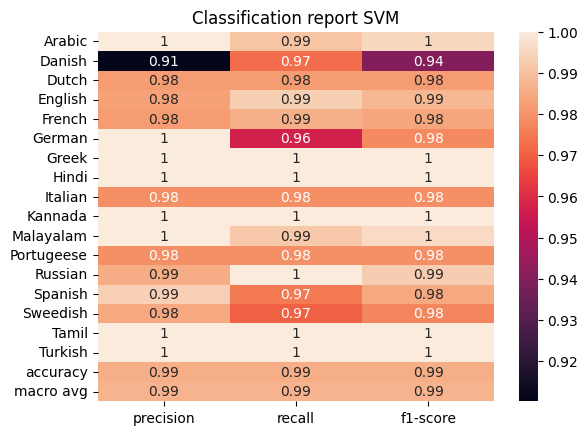

In [80]:
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)

report_mlp_df = pd.DataFrame(report_mlp).transpose()

sns.heatmap(report_mlp_df.iloc[:-1, :-1], annot=True)
plt.title("Classification report SVM")
plt.show()

On obtient à nouveau un rapport de classification très satisfaisant, qui a la particularité d'avoir beaucoup de scores au dessus de 0.98 à la fois dans la précision, le recall et le f1-score, comparé aux deux rapports précédents.

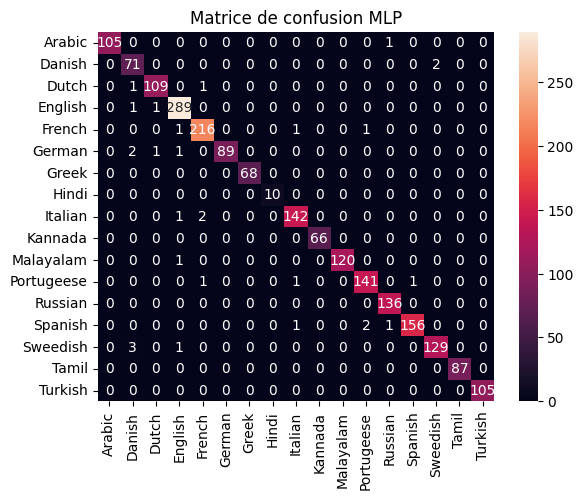

In [79]:
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
labels = [str(label) for label in mlp_model.classes_]
sns.heatmap(cm_mlp, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.title("Matrice de confusion MLP")
plt.show()

La matrice de confusion reste similaire à celles observées précedemment.

### TESTS MANUELS

In [ ]:
# rappel: phrase = "Un des animaux emblématiques de l'île de la Réunion est le paille-en-queue."

In [82]:
phrase_tfidf = tfidf.transform([phrase])  

In [83]:
# MLP
pred_lang_mlp = mlp_model.predict(phrase_tfidf)
proba_mlp = mlp_model.predict_proba(phrase_tfidf)

print("Langue prédite MLP:", pred_lang_mlp[0])
print(f"Confiance : {max(proba_mlp[0]):.2f}")

Langue prédite MLP: French
Confiance : 1.00


# ---------------------------------------------------------------------------------------------------------------------------------------

## III./. COMPARAISON DES MODELES

On pourrait dans notre dernier point, comparer les différents modèles que nous venons d'étudier, afin, peut-être, d'en déceler un ou plusieurs qui seraient les plus adaptés à cette tâche, ou les plus efficaces.

Faisons un tableau comparatif des différentes méthodes:

| Modèle               | Accuracy | Temps d'entraînement (s)  | Observations                                                                       |
|----------------------|----------|---------------------------|------------------------------------------------------------------------------------|
| Naive Bayes          | 0.9898   | 0.0                       | Ultra rapide, très performant avec `CountVectorizer` + n-grams                     |
| Régression Logistique| 0.9850   | 11.8                      | Bonne généralisation, robuste avec TF-IDF, mais sensible au réglage des paramètres |
| SVM                  | 0.9840   | 32.8                      | Performant, mais lent à entraîner ; pas de prédiction de probabilité possible      |
| MLP                  | 0.9859   | 495.5                     | Plus long à entraîner ; bon potentiel, mais nécessite du tuning et plus de données |


### COMPARAISON

Au terme de cette étude comparative, le modèle Naive Bayes s’est révélé comme être le plus efficace pour la tâche de détection de langues. 

Avec une accuracy de 98.98% et un temps d'entraînement quasi nul, il offre un excellent compromis entre simplicité, rapidité et performance. 

Bien que les autres modèles aient également obtenu de bons résultats, ils se sont avérés plus coûteux en temps de calcul, sans pour autant surpasser Naive Bayes en précision. 

La régression logistique reste un bon choix pour son côté probabiliste et interprétable, tandis que le SVM peut être utile dans des cas plus complexes malgré l’absence de prédiction probabiliste par défaut. 

Enfin, le MLP pourrait montrer plus de son potentiel sur des jeux de données plus volumineux ou avec un meilleur réglage des hyperparamètres, mais dans notre contexte, il reste trop gourmand pour un gain limité. Cela reste une piste à explorer.

En somme, les modèles classiques restent très compétitifs pour des tâches de NLP simples comme la détection de langues sur de courts textes.

### DIFFICULTES

Malgré les bons résultats obtenus, plusieurs difficultés ont été identifiées au cours de ce projet. 

Tout d'abord, la répartition déséquilibrée des classes dans le dataset a pu influencer les performances de certains modèles : certaines langues comme Hindi sont très peu représentées par rapport à d’autres comme l’anglais ou le français, ce qui peut biaiser l’apprentissage. 

Ensuite, les modèles ont parfois montré une confusion entre langues proches, par exemple entre l’espagnol et le portugais, ou bien le danois et le suédois, dont les similarités rend la distinction plus complexe pour les algorithmes, surtout sur des phrases courtes. 

Enfin, bien que les données soient globalement de bonne qualité, les performances peuvent être affectées par la variabilité de la longueur des phrases, ou la présence de bruit dans certaines langues moins bien représentées. 

Ces challenges mettent en lumière l’importance d’une analyse fine des erreurs et de l’équilibrage des données pour améliorer encore la robustesse et la performance des modèles.

### CONCLUSION

Ce projet de détection automatique de la langue a permis de comparer plusieurs approches classiques du NLP, allant du Naive Bayes à des modèles de Neural Networks comme le MLP, en passant par la régression logistique et le SVM. 

Globalement, les résultats sont très satisfaisants, avec des accuracy proches ou supérieures à 98 %, notamment grâce à une bonne vectorisation et un prétraitement adapté.

Toutefois, des pistes d’amélioration sont envisageables. On pourrait par exemple tester des modèles de deep learning plus avancés comme des réseaux bi-LSTM, ou bien exploiter le transfert learning à l’aide de modèles multilingues pré-entraînés comme BERT ou XLM-Roberta, capables de mieux capturer les sémantiques des langues. 

De plus, un meilleur équilibrage des classes, un nettoyage plus fin des textes et une augmentation des classes qui sont sous-représentées pourraient encore affiner les performances. 